# ID3 Calssifier
ID3 stands for **Iterative Dichotomiser 3**. Our job is to determine whether the player will play or not, given the following conditions.
# Theory
## Gini Impurity
$$\text{Gini Impurity} = 1-\sum_{i=0}^n p_i^2$$
## Entropy of a dataset
$$\text{Entropy} = -\sum_{i=0}^n p_i\log_2(p_i)$$
Where $p_i$ is the probability fo being selected, of each of unique values of the key feature. In our case, the key feature is ```play```.
## Information Gain of a feature
$$\text{Information Gain = Entropy(Entire Dataset)}-\sum_{i=0}^n \text{Probability of}\ f_i\times\text{Entropy of}\ f_i$$
Where $f_i$ is the $i$-th unique value of that feature.<br/>
**Note:** Both Gini Impurity and Entropy are valid metrics for calculating impurity of a dataset and both can be used to calculate Information Gain of a feature. However for large datasets, it's recommended to use **Gini Impurity** since it takes less time to compute. In our example, we're gonna use Entropy.
### Refer to the video below for more information

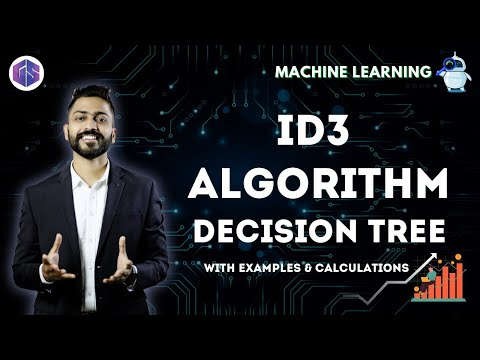

In [1]:
from IPython.display import YouTubeVideo as YTV

videos = ['CWzpomtLqqs']

for video in videos:
    v = YTV(video, height = 370, width = 600)
    display(v)

# Importing the dataset

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv("./PlayTennis.csv")
data

,weather,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


# Entropy of the whole dataset

In [3]:
from math import log
log2 = log(2)

def calc_entropy(dataset, key = "play"):
    categories = dataset[key].unique()
    total_no_obs = dataset.shape[0]
    
    entropy_dataset = 0.0
    for category in categories:
        number = dataset[dataset[key] == category].shape[0]
        prob = float(number) / float(total_no_obs)
        entropy_dataset -= (prob * log(prob) / log2)

    return entropy_dataset

entropy_full = calc_entropy(data, "play")
entropy_full

0.9402859586706309

# Determining the Root Node

In [4]:
def get_root_node(dataset, key = "play"):
    inf_gain_map = {}
    
    for col in dataset.columns:
        if col != key:
            features_array = dataset[col].unique()
            inf_gain = calc_entropy(dataset)
            
            for category in features_array:
                tmp_dataset = dataset[dataset[col] == category]
                entropy  = calc_entropy(tmp_dataset)
                prob = float(tmp_dataset.shape[0]) / float(dataset.shape[0])
                inf_gain -= (entropy * prob)
            inf_gain_map[col] = inf_gain
            
    root_feature = max(zip(inf_gain_map.values(), inf_gain_map.keys()))[1]
    return root_feature, inf_gain_map

root1, if_gain_map = get_root_node(data)
print(f"First split feature: {root1}")
if_gain_map

First split feature: weather


{'weather': 0.24674981977443888,
 'temp': 0.029222565658954647,
 'humidity': 0.15183550136234142,
 'windy': 0.04812703040826932}

As we can see, the ```weather``` feature has the maximum Information gain. So that will be the root node and we will first split our dataset on the basis of ```weather```.

In [5]:
features_array = data.weather.unique()

split_datasets_1 = []
for category in features_array:
    split_datasets_1.append(data[data.weather == category])

split_datasets_1[0]

,weather,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [6]:
split_datasets_1[1]

,weather,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


In [7]:
split_datasets_1[2]

,weather,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


As we can see, when the ```weather``` is ```overcast``` then the player will always play regardless of the other features. Now we need to find the feature which has the maximum information gain in the first dataset split where ```weather``` is ```sunny```.
# Determining the second root node

In [8]:
base_data_set = split_datasets_1[0]

root2, if_gain_map = get_root_node(base_data_set)
print(f"Second split feature: {root2}")
if_gain_map

Second split feature: humidity


{'weather': 0.0,
 'temp': 0.5709505944546688,
 'humidity': 0.9709505944546688,
 'windy': 0.019973094021975113}

As we can see, the ```humdity``` feature has the maximum Information gain. So that will be the root node and we will first split our dataset on the basis of ```humdity```.<br/>
**Note:** Since all values of ```weather``` are same, it's entropy is 0.

In [9]:
features_array = data.humidity.unique()

split_datasets_2 = []
for category in features_array:
    split_datasets_2.append(base_data_set[base_data_set.humidity == category])

split_datasets_2[0]

,weather,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no


In [10]:
split_datasets_2[1]

,weather,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


Now we need to do the same with the third split dataset.
# Determining the third root node

In [11]:
base_data_set = split_datasets_1[2]

root3, if_gain_map = get_root_node(base_data_set)
print(f"Third split feature: {root3}")
if_gain_map

Third split feature: windy


{'weather': 0.0,
 'temp': 0.019973094021975113,
 'humidity': 0.019973094021975113,
 'windy': 0.9709505944546688}

In [12]:
features_array = data.windy.unique()

split_datasets_3 = []
for category in features_array:
    split_datasets_3.append(base_data_set[base_data_set.windy == category])

split_datasets_3[0]

,weather,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [13]:
split_datasets_3[1]

,weather,temp,humidity,windy,play
5,rainy,cool,normal,True,no
13,rainy,mild,high,True,no


# Decision Tree Diagram
![Decision Tree](Diagram.png)<br/>
The positive numbers indicate number of ```yes``` and the negative numbers indicate number of ```no```.<br/>
Now let's see how we can create a decision tree using Scikit-learn.
## Preparing the data
### First we need to convert the data to numerical data using Scikit-learn Label Encoder

In [14]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
data['weather'] = Le.fit_transform(data['weather'])
data['temp'] = Le.fit_transform(data['temp'])
data['humidity'] = Le.fit_transform(data['humidity'])
data['windy'] = Le.fit_transform(data['windy'])
data['play'] = Le.fit_transform(data['play'])

In [15]:
data

,weather,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [16]:
features_cols = ['weather','temp','humidity','windy']
X = data[features_cols]
Y = data.play

# Creating the Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
consume_output = classifier.fit(X, Y)

# Testing the Classifier

In [18]:
classifier.predict(X)

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [19]:
classifier.score(X, Y)

1.0

# Visualizing the Decision Tree Classifier

[Text(0.4, 0.9, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3, 0.5, 'x[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.5, 'x[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.3, 'x[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

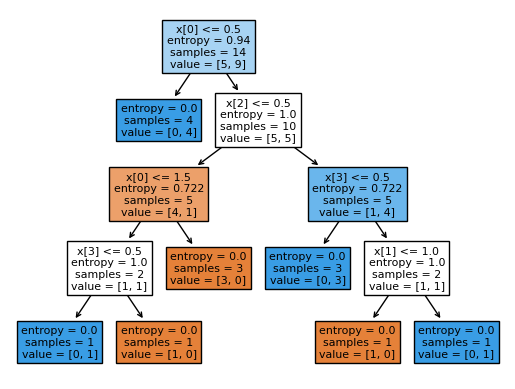

In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, Y)
tree.plot_tree(clf, filled = True)

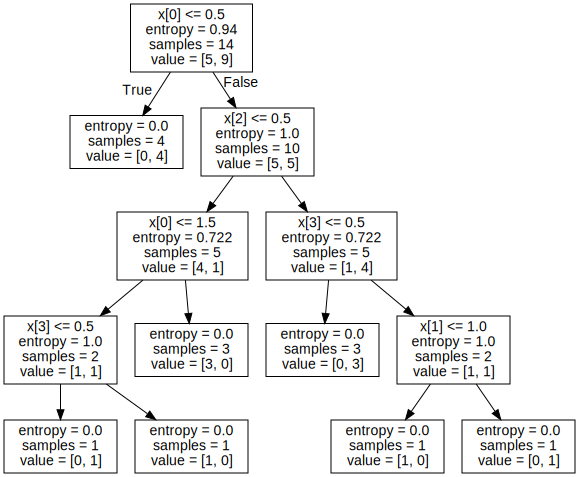

In [21]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

***